In [1]:
# Need data to be zero mean and scaled???

# Stochastic algorithm 3
import numpy as np

import matplotlib.pyplot as plt

from scipy.signal import cont2discrete, lti, dlti, dstep, StateSpace
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32
import control

# ID
from __future__ import division

from past.utils import old_div

# Checking path to access other files
try:
    from sippy import *
except ImportError:
    import sys, os

    sys.path.append(os.pardir)
    from sippy import *

import numpy as np
from sippy import functionset as fset
from sippy import functionsetSIM as fsetSIM
import matplotlib.pyplot as plt

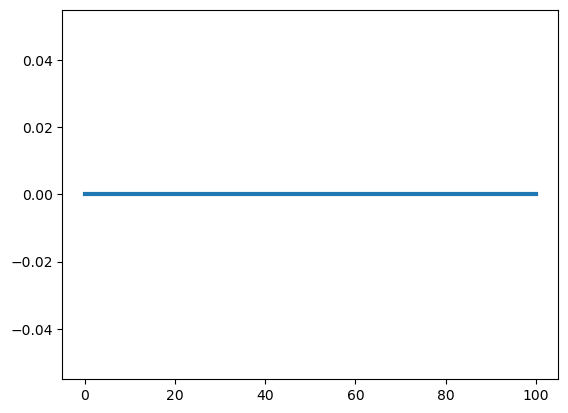

In [2]:
# system
#A = np.array([[0 1],[0 0]])
#B = np.array([[0],[1]])
#C = np.array([[1 0]])
#D = np.array([[0],[0]])


A = np.array([[0, 1],[-10., -3]])
B = np.array([[0],[0.]])
C = np.array([[1., 0]])
D = np.array([[0.]])



l_system = lti(A, B, C, D)

t, x = l_system.step(T=np.linspace(0, 100, 1000))

fig, ax = plt.subplots()

ax.plot(t, x, label='Continuous', linewidth=3)

In [3]:
sys = StateSpace(A, B, C, D)
print(sys)

dt = 0.01
dsys = sys.to_discrete(dt)
print(dsys)

print(dsys.A)

StateSpaceContinuous(
array([[  0.,   1.],
       [-10.,  -3.]]),
array([[0.],
       [0.]]),
array([[1., 0.]]),
array([[0.]]),
dt: None
)
StateSpaceDiscrete(
array([[ 0.999505  ,  0.00984985],
       [-0.09849847,  0.96995546]]),
array([[0.],
       [0.]]),
array([[1., 0.]]),
array([[0.]]),
dt: 0.01
)
[[ 0.999505    0.00984985]
 [-0.09849847  0.96995546]]


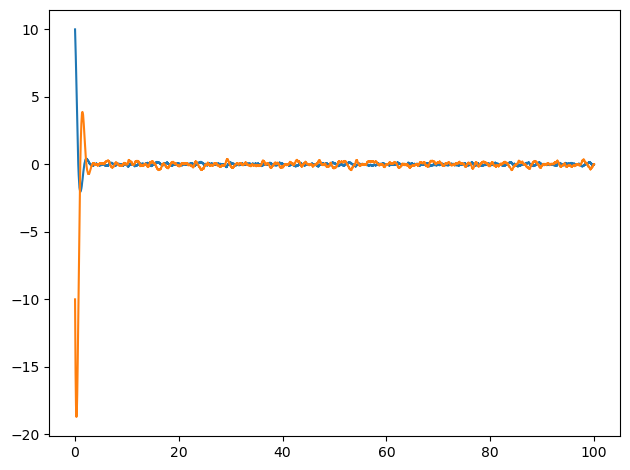

In [4]:
# u=np.zeros((2,1000))
# t=np.linspace(0, 100, 1000).T
# print(u.shape)
# print(t.shape)
# dsys.output(u,t)

# Forecast
tf = 100
tt = int(tf/dt)
t = np.linspace(0,tf,tt)
p = 1
r = 2
x = np.zeros([r,tt])
x[:,0] = [10,-10]
y = np.zeros([p,tt])

for i in range(tt-1):
    x[:,i+1] = dsys.A@x[:,i] + np.random.normal(0,0.01,2)
    y[:,i] = dsys.C@x[:,i] + np.random.normal(0,0.01,1)
    

fig, ax = plt.subplots()
ax.plot(t,x.T)

fig.tight_layout()
plt.show()


In [5]:
# dt = 0.01


# d_system = cont2discrete((A, B, C, D), dt, method='zoh')

# s, x_d = dstep(d_system,n=1000)

# #print(s.shape)
# #print(x_d.shape)
# fig, ax = plt.subplots()

# #ax.step(s, np.squeeze(x_d), label='zoh', where='post')
# ax.plot(s, np.squeeze(x_d))

# #ax.axis([t[0], t[-1], x[0], 1.4])

# #ax.legend(loc='best')

# fig.tight_layout()

# plt.show()
# #print(d_system)
# print(x_d)


In [6]:
# Hankel Matrices i>n and j -> \infty
def Hankel(data,h,w):
    p = data.shape[0]
    J = w # 500
    I = h  # double
    Y = np.empty([2*I*p,J])

    for i in range(2*I):
        Y[i*(p):(i+1)*p,:] = data[:,i:J+i]
    
    return Y

In [7]:
#p = 1   # output dimension
I = 100 # 
J = 5000
Y = Hankel(y,I,J)
Yp = Y[:I*p,:]
Yf = Y[I*p:,:]

Ypp = Y[:(I+1)*p,:]
yff = Y[(I+1)*p:,:]

print(Yp.shape)
print(Ypp.shape)
print(Yf.shape)
print(yff.shape)

(100, 5000)
(101, 5000)
(100, 5000)
(99, 5000)


In [8]:
# # Hankel Test
# e = 0
# #for i in range(2*I-1):
# for i in range(10):
#     e = e + sc.linalg.norm(Y[i*(p):(i+1)*p,1:] - Y[(i+1)*(p):(i+2)*p,:-1])
#     print(Y[i*(p):(i+1)*p,1])
#     print(Y[(i+1)*(p):(i+2)*p,0])
#     print(Y[i*(p):(i+1)*p,0])
    
# print(e)
# #passed

In [9]:
def Project(A,B):
    return A@B.T@np.linalg.pinv(B@B.T)@B 

In [10]:
Oi = Project(Yf,Yp)
oi = Project(yff,Ypp)

In [11]:
#W1 = np.eye(p*I)
#W2 = np.eye(J)
#O = W1@Oi@W2
O = Oi
print(Oi.shape)
print(O.shape)

(100, 5000)
(100, 5000)


In [12]:
U, s, VT = np.linalg.svd(O, full_matrices=False)

(100,)


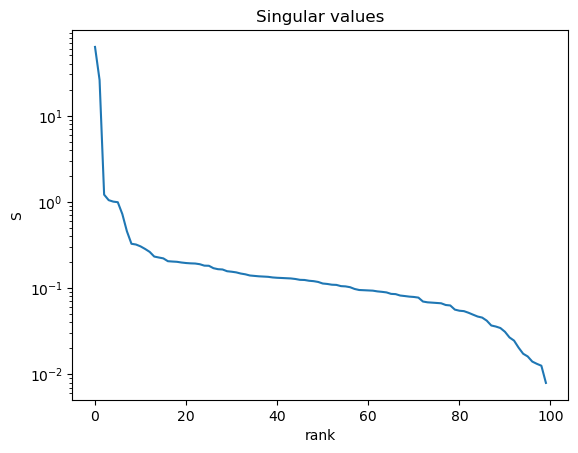

In [13]:
print(s.shape)
fig, ax = plt.subplots()
ax.plot(s)

ax.set(xlabel='rank', ylabel='S',
       title='Singular values')
ax.set_yscale('log')
plt.show()

In [14]:
# get r from svd
U_r = U[:,:r]
S_r = np.diag(s[:r,])

In [15]:
Gi = U_r@sc.linalg.sqrtm(S_r)
gi = Gi[:-p,:]
ggi = Gi[p:,:]
Xhat = np.linalg.pinv(Gi)@Oi
XXhat = np.linalg.pinv(gi)@oi
Yi = Yf[:p,:]
print(S_r)
print(sc.linalg.sqrtm(S_r))
print(Gi.shape)
print(gi.shape)
print(gi.shape)
print(ggi.shape)

[[62.66358553  0.        ]
 [ 0.         25.91642632]]
[[7.91603345 0.        ]
 [0.         5.09081784]]
(100, 2)
(99, 2)
(99, 2)
(99, 2)


In [16]:
#alternate 
alt_Ahat = np.linalg.pinv(gi)@ggi
alt_Chat = Gi[:p,:]

In [17]:
AChat = np.concatenate((XXhat,Yi), axis=0)@np.linalg.pinv(Xhat)
print(AChat)
print(dsys.A)
print(dsys.C)

[[ 0.97998127 -0.02823893]
 [ 0.02796776  0.99121331]
 [-1.60568557 -0.68883626]]
[[ 0.999505    0.00984985]
 [-0.09849847  0.96995546]]
[[1. 0.]]


In [18]:
A_hat = XXhat@np.linalg.pinv(Xhat)
print(A_hat.shape)
C_hat = Yi@np.linalg.pinv(Xhat)
print(C_hat.shape)

print(A_hat)
print(dsys.A)
print(C_hat)
print(dsys.C)

(2, 2)
(1, 2)
[[ 0.97998127 -0.02823893]
 [ 0.02796776  0.99121331]]
[[ 0.999505    0.00984985]
 [-0.09849847  0.96995546]]
[[-1.60568557 -0.68883626]]
[[1. 0.]]


In [19]:
# residuals
rho_w = XXhat - A_hat@Xhat
rho_v = Yi - C_hat@Xhat
rho =  np.concatenate((rho_w, rho_v), axis=0)
print(rho.shape)
Cov = np.cov(rho)
print(Cov.shape)
Q = Cov[:r,:r]
R = Cov[-p:,-p:]
S = Cov[:r,-p:]
print(Q.shape)
print(S.shape)
print(R.shape)
EE = rho@rho.T


(3, 5000)
(3, 3)
(2, 2)
(2, 1)
(1, 1)


In [20]:
# Forecast
# tt = 50
# x = np.zeros([r,tt])
# x[:,0] = Xhat[:,0]
# y = np.zeros([p,tt])

# for i in range(tt-1):
#     x[:,i+1] = A_hat@x[:,i]
#     y[:,i] = C_hat@x[:,i]

tf = 10
tt = int(tf/dt)
t = np.linspace(0,tf,tt)

xhat = np.zeros([r,tt])
xhat[:,0] = [10,-10]
yhat = np.zeros([p,tt])

for i in range(tt-1):
    xhat[:,i+1] = A_hat@xhat[:,i]
    yhat[:,i] = C_hat@xhat[:,i]
    

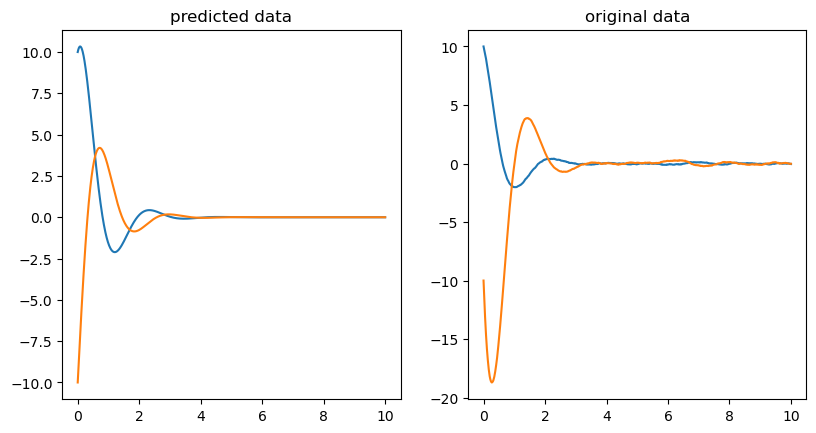

In [21]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm

%matplotlib inline
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
ax.set_title('predicted data')
ax.plot(t,xhat[:,:len(t)].T)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
ax.set_title('original data')
ax.plot(t,x[:,:len(t)].T)

plt.show()

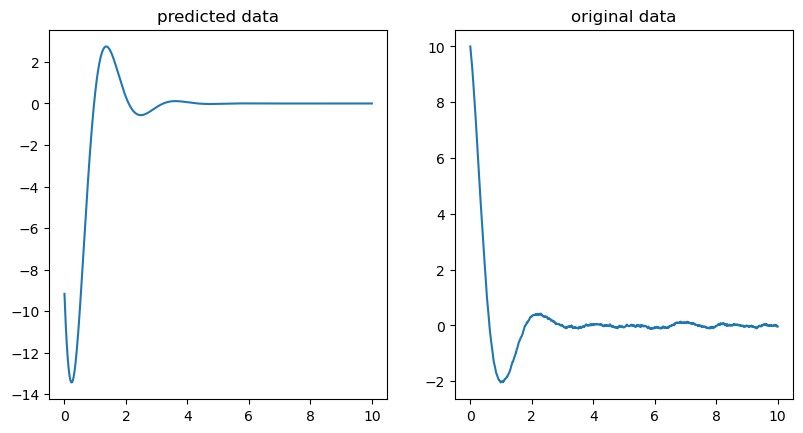

In [22]:
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
ax.set_title('predicted data')
ax.plot(t,yhat[:,:len(t)].T)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
ax.set_title('original data')
ax.plot(t,y[:,:len(t)].T)

plt.show()

In [23]:
print(A_hat - dsys.A)
print(C_hat - dsys.C)

[[-0.01952374 -0.03808878]
 [ 0.12646623  0.02125785]]
[[-2.60568557 -0.68883626]]


In [24]:
#Lyaps
Sig = sc.linalg.solve_discrete_lyapunov(A_hat,Q)
G = A_hat@Sig@C.T + S
L0 = C@Sig@C.T + R

In [25]:
print(alt_Ahat)
print(dsys.A)

[[ 0.97998127 -0.02823893]
 [ 0.02796776  0.99121331]]
[[ 0.999505    0.00984985]
 [-0.09849847  0.96995546]]


In [26]:
print(alt_Chat)
print(dsys.C)

[[-1.60568557 -0.68883626]]
[[1. 0.]]


In [27]:
print(alt_Ahat - dsys.A)
print(alt_Chat - dsys.C)

[[-0.01952374 -0.03808878]
 [ 0.12646623  0.02125785]]
[[-2.60568557 -0.68883626]]


In [28]:
# Kalman
print(Q)
print(R)
print(S)
print(Cov)
print(EE)

[[ 5.37791965e-05 -1.41993739e-05]
 [-1.41993739e-05  3.77518201e-06]]
[[0.00028153]]
[[-1.18076191e-04]
 [ 3.19384018e-05]]
[[ 5.37791965e-05 -1.41993739e-05 -1.18076191e-04]
 [-1.41993739e-05  3.77518201e-06  3.19384018e-05]
 [-1.18076191e-04  3.19384018e-05  2.81528784e-04]]
[[ 0.2688541  -0.07098429 -0.59024493]
 [-0.07098429  0.01887236  0.15965762]
 [-0.59024493  0.15965762  1.40738948]]


In [29]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (dim_x=2, dim_z=1)

In [30]:
f.x = np.array([[0.],    # position
                [0.]])   # velocity
f.F = np.array([[1.,1.],
                [0.,1.]])
f.H = np.array([[1.,0.]])
f.P = np.array([[1000.,    0.],
                [   0., 1000.] ])
f.R = np.array([[5.]])


from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)
print(f.Q)
z = y[:,0]
f.predict()
f.update(z)

print(f.x)

[[3.25e-06 6.50e-05]
 [6.50e-05 1.30e-03]]
[[9.97268682]
 [4.98634373]]


In [31]:
#Q = EE[:r,:r]
#R = EE[-p:,-p:]
#S = EE[:r,-p:]

In [38]:
f.x = np.array([[10.],    # position
                [-10.]])   # velocity
f.F = A_hat
f.H = C_hat
#f.F = dsys.A
#f.H = dsys.C
f.P = np.array([[1,  0.],
                [0., 1] ])
f.R = R
f.Q = Q

print(Q)
from filterpy.common import Q_discrete_white_noise
#f.Q = Q_discrete_white_noise(dim=2, dt=0.01, var=0.01)

print(f.Q)
f.R = np.array([[5]])



tf = 10
tt = int(tf/dt)
t = np.linspace(0,tf,tt)
xx = np.zeros([r,tt])
yy = np.zeros([p,tt])
xx[:,0] = f.x[:,0]
for i in range(tt-1):
    z = y[:,0]
    f.predict()
    f.update(z)
    #print(f.x)
    xx[:,i+1] = f.x[:,0] 
    yy[:,i] = C_hat@xx[:,i+1]

[[ 5.37791965e-05 -1.41993739e-05]
 [-1.41993739e-05  3.77518201e-06]]
[[ 5.37791965e-05 -1.41993739e-05]
 [-1.41993739e-05  3.77518201e-06]]


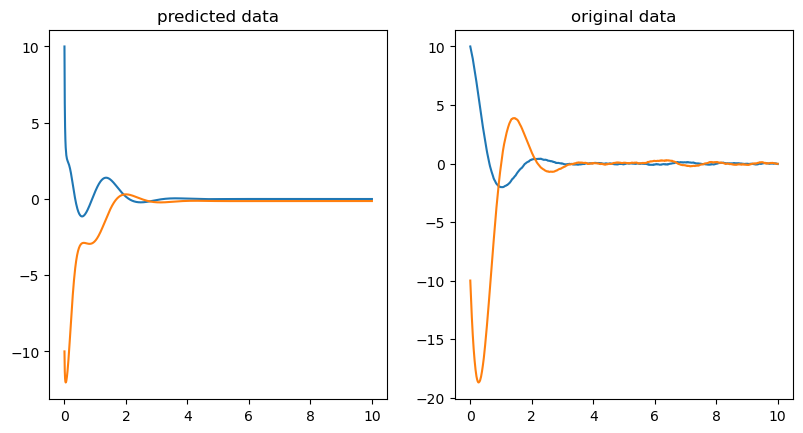

In [39]:
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
ax.set_title('predicted data')
ax.plot(t,xx[:,:len(t)].T)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
ax.set_title('original data')
ax.plot(t,x[:,:len(t)].T)

plt.show()

In [34]:
print(xx[:,:5])

[[ 10.           0.16998785   0.10664186   0.03183407  -0.17210731]
 [-10.         -13.97743711 -13.75097502 -13.23461291 -12.40707009]]


In [35]:
w, v = np.linalg.eig(dsys.A)
print(w)
print(v)

[0.98473023+0.02742081j 0.98473023-0.02742081j]
[[-0.14301939-0.26543275j -0.14301939+0.26543275j]
 [ 0.95346259+0.j          0.95346259-0.j        ]]
